## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [8]:
# your code here
import torch

#sigmoid: 1/(1 + e^(-x))

def sigmoid(x):
    return 1/(1 + torch.exp(-x))

def sigmoid_gradient(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

point1 = torch.tensor(2.0, requires_grad=True)
point2 = torch.tensor(- 1.0, requires_grad=True)

#Gradient with pytorch
grad1 = torch.autograd.grad(sigmoid(point1), point1)[0]
grad2 = torch.autograd.grad(sigmoid(point2), point2)[0]

#Gradient with explicit formula
grad1_explicit = sigmoid_gradient(point1)
grad2_explicit = sigmoid_gradient(point2)

print("Gradient at point 1 (PyTorch):", grad1.item())
print("Gradient at point 2 (PyTorch):", grad2.item())
print("Gradient at point 1 (Explicit formula):", grad1_explicit.item())
print("Gradient at point 2 (Explicit formula):", grad2_explicit.item())

Gradient at point 1 (PyTorch): 0.10499356687068939
Gradient at point 2 (PyTorch): 0.1966119408607483
Gradient at point 1 (Explicit formula): 0.10499362647533417
Gradient at point 2 (Explicit formula): 0.1966119408607483


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [9]:
# your code here
import torch

#linear activation f
#f(x) = x

def linear(x):
    return x

def linear_gradient(x):
    return torch.ones_like(x)

point1 = torch.tensor(2.0, requires_grad=True)
point2 = torch.tensor(-1.0, requires_grad=True)

grad1 = torch.autograd.grad(linear(point1), point1)[0]
grad2 = torch.autograd.grad(linear(point2), point2)[0]

explicit_grad1 = linear_gradient(point1)
explicit_grad2 = linear_gradient(point2)

print("Gradient at point 1 (PyTorch):", grad1.item())
print("Gradient at point 2 (PyTorch):", grad2.item())
print("Gradient at point 1 (Explicit formula):", explicit_grad1.item())
print("Gradient at point 2 (Explicit formula):", explicit_grad2.item())


Gradient at point 1 (PyTorch): 1.0
Gradient at point 2 (PyTorch): 1.0
Gradient at point 1 (Explicit formula): 1.0
Gradient at point 2 (Explicit formula): 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [11]:
# your code here
import torch

# Define the ReLU function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# Define the gradient of ReLU function using PyTorch's autograd
def relu_gradient(x):
    return torch.where(x < 0, torch.tensor(0.0), torch.tensor(1.0))

# Define two points
point1 = torch.tensor(2.0, requires_grad=True)
point2 = torch.tensor(-1.0, requires_grad=True)

# Compute the gradient using PyTorch
grad1 = torch.autograd.grad(relu(point1), point1)[0]
grad2 = torch.autograd.grad(relu(point2), point2)[0]

# Compute the gradient using the explicit formula
explicit_grad1 = relu_gradient(point1)
explicit_grad2 = relu_gradient(point2)

print("Gradient at point 1 (PyTorch):", grad1.item())
print("Gradient at point 2 (PyTorch):", grad2.item())
print("Gradient at point 1 (Explicit formula):", explicit_grad1.item())
print("Gradient at point 2 (Explicit formula):", explicit_grad2.item())


Gradient at point 1 (PyTorch): 1.0
Gradient at point 2 (PyTorch): 0.0
Gradient at point 1 (Explicit formula): 1.0
Gradient at point 2 (Explicit formula): 0.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

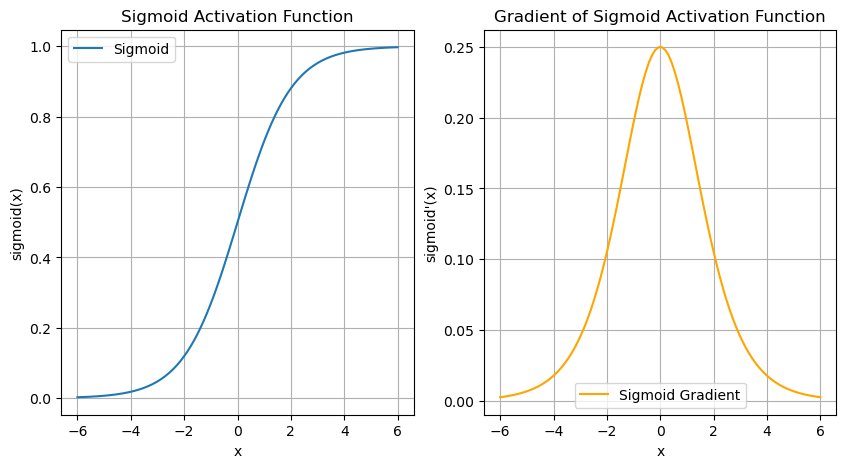

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = torch.linspace(-6, 6, 100)

# Compute sigmoid values and convert to numpy
sigmoid_values = sigmoid(x).detach().numpy()

# Compute sigmoid gradient values
sigmoid_gradient_values = sigmoid_gradient(x).detach().numpy()

# Plot sigmoid activation function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), sigmoid_values, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()

# Plot sigmoid gradient
plt.subplot(1, 2, 2)
plt.plot(x.numpy(), sigmoid_gradient_values, label='Sigmoid Gradient', color='orange')
plt.title('Gradient of Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('sigmoid\'(x)')
plt.grid(True)
plt.legend()

plt.show()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

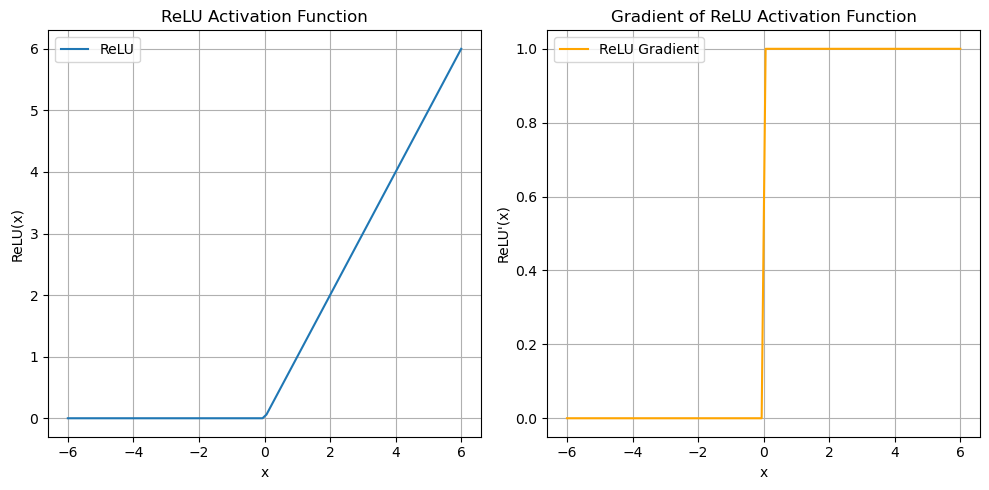

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = torch.linspace(-6, 6, 100)

# Compute ReLU values
relu_values = relu(x).detach().numpy()

# Compute ReLU gradient values
relu_gradient_values = relu_gradient(x).detach().numpy()

# Plot ReLU activation function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), relu_values, label='ReLU')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

# Plot ReLU gradient
plt.subplot(1, 2, 2)
plt.plot(x.numpy(), relu_gradient_values, label='ReLU Gradient', color='orange')
plt.title('Gradient of ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU\'(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

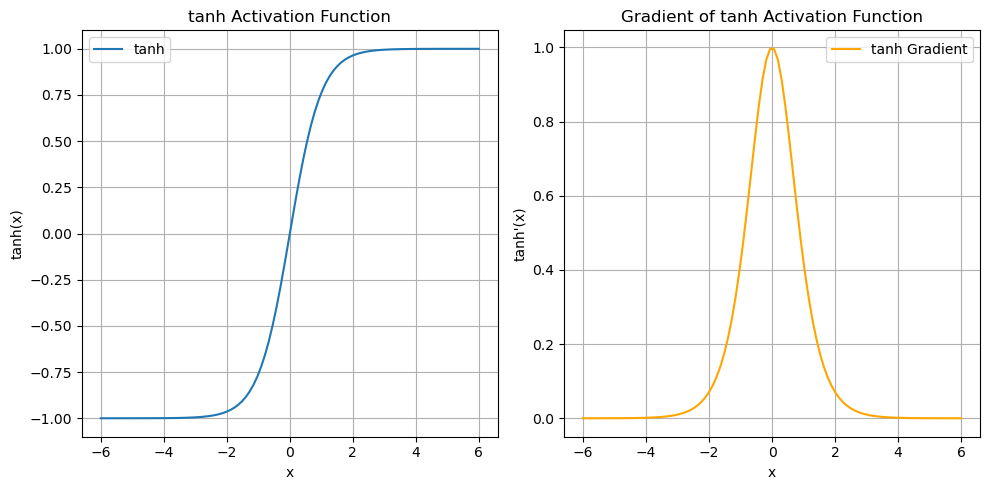

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# tanh activation function
def tanh(x):
    return np.tanh(x)

# Gradient of tanh function
def tanh_gradient(x):
    return 1 - np.tanh(x)**2

# Generate x values
x = np.linspace(-6, 6, 100)

# Compute tanh values
tanh_values = tanh(x)

# Compute tanh gradient values
tanh_gradient_values = tanh_gradient(x)

# Plot tanh activation function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, tanh_values, label='tanh')
plt.title('tanh Activation Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

# Plot tanh gradient
plt.subplot(1, 2, 2)
plt.plot(x, tanh_gradient_values, label='tanh Gradient', color='orange')
plt.title('Gradient of tanh Activation Function')
plt.xlabel('x')
plt.ylabel('tanh\'(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

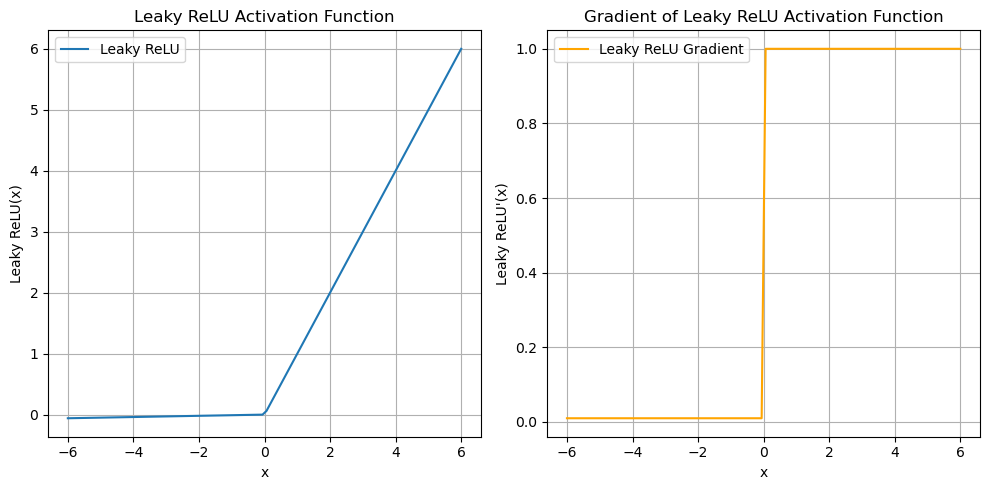

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Gradient of Leaky ReLU function
def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)

# Generate x values
x = np.linspace(-6, 6, 100)

# Compute leaky ReLU values
leaky_relu_values = leaky_relu(x)

# Compute leaky ReLU gradient values
leaky_relu_gradient_values = leaky_relu_gradient(x)

# Plot leaky ReLU activation function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, leaky_relu_values, label='Leaky ReLU')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid(True)
plt.legend()

# Plot leaky ReLU gradient
plt.subplot(1, 2, 2)
plt.plot(x, leaky_relu_gradient_values, label='Leaky ReLU Gradient', color='orange')
plt.title('Gradient of Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU\'(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [27]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [28]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5195], grad_fn=<SigmoidBackward0>)


In [21]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5650
Epoch [200/1000], Loss: 0.5603
Epoch [300/1000], Loss: 0.5599
Epoch [400/1000], Loss: 0.5599
Epoch [500/1000], Loss: 0.5598
Epoch [600/1000], Loss: 0.5598
Epoch [700/1000], Loss: 0.5598
Epoch [800/1000], Loss: 0.5598
Epoch [900/1000], Loss: 0.5598
Epoch [1000/1000], Loss: 0.5598


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Perceptron class
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        #We don't need to declare the activation function because the binary BCEWithLogitsLoss contains it

    def forward(self, x):
        x = self.linear(x)
        return x


# Define the stochastic gradient descent optimizer
perceptron = Perceptron(input_dim=2)  # Input dimension for OR gate is 2

# Define the optimizer and the binary cross-entropy loss function.
optimizer = optim.SGD(perceptron.parameters(), lr=0.1)
criterion = nn.BCEWithLogitsLoss()

# Input data for OR gate
input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
# Labels for OR gate
labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Train the Perceptron model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate predictions
predictions = torch.sigmoid(perceptron(input_data))
# Convert predictions to binary (0 or 1)
predictions_binary = torch.round(predictions)
# Calculate accuracy
accuracy = (predictions_binary == labels).sum().item() / labels.size(0)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch [100/1000], Loss: 0.3262
Epoch [200/1000], Loss: 0.2563
Epoch [300/1000], Loss: 0.2101
Epoch [400/1000], Loss: 0.1772
Epoch [500/1000], Loss: 0.1528
Epoch [600/1000], Loss: 0.1339
Epoch [700/1000], Loss: 0.1190
Epoch [800/1000], Loss: 0.1069
Epoch [900/1000], Loss: 0.0969
Epoch [1000/1000], Loss: 0.0886
Accuracy: 100.00%
